#### Predicting presence of chronice kidner disease

The data consists of 24 features taken over 2 months of 400 patients. #  
158 patients have complete records the rest 242 patients have missing information in the records.


In [1]:
# importing lib

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns


In [2]:
# import data 
df = pd.read_csv("kidney_disease.csv", sep=",")
df.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
# get the number of null values in each column
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [16]:
# imputing missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_imputed = pd.DataFrame(imputer.fit_transform(df))
df_imputed.columns = df.columns
df_imputed.isnull().sum()

#convert to same dtype
# for col in df.columns:
#     df_imputed[col] = df[col].astype(df[col].dtype.name)

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [17]:
# checking if there are any garbage values in the data

for col in pd.DataFrame(df_imputed.select_dtypes(include=['object'])).columns:
    print(" -------------------------", col, "-------------------------")
    print("\n")
    print(df_imputed[col].unique())
    print("\n")
    

 ------------------------- id -------------------------


[0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153
 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225
 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243
 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259

In [18]:
df_imputed['classification']=df_imputed['classification'].apply(lambda x: 'ckd' if x=='ckd\t' else x)

df_imputed['cad']=df_imputed['cad'].apply(lambda x: 'no' if x=='\tno' else x)

df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'yes' if x=='\tyes' else x)
df_imputed['dm']=df_imputed['dm'].apply(lambda x: 'yes' if x==' yes' else x)

df_imputed['rc']=df_imputed['rc'].apply(lambda x: '5.2' if x=='\t?' else x)

df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t6200' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t8400' else x)
df_imputed['wc']=df_imputed['wc'].apply(lambda x: '9800' if x=='\t?' else x)

df_imputed['pcv']=df_imputed['pcv'].apply(lambda x: '41' if x=='\t43' else x)
df_imputed['pcv']=df_imputed['pcv'].apply(lambda x: '41' if x=='\t?' else x)

Axes(0.125,0.11;0.775x0.77)


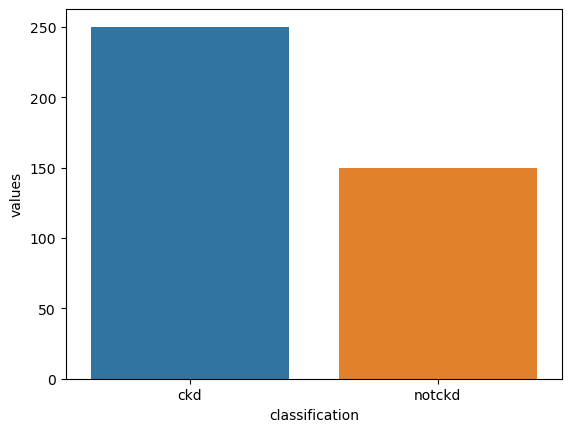

In [20]:
# checking for label imbalance

import matplotlib.pyplot as plt
import seaborn as sns

label_count = df_imputed['classification'].value_counts()
label_count_df = pd.DataFrame({'classification': label_count.index, 'values':label_count.values})
print(sns.barplot(x='classification', y='values', data=label_count_df))


In [21]:
# convert column datatypes
for col in df_imputed.select_dtypes(exclude=['object']).columns:
    df_imputed[col] = df_imputed[col].apply(lambda x: float(x))